# Analysis notebook for valence judgments

In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Parse valence from raw responses and save csvs

In [ ]:
input_dir = '../datasets/llm_outputs/valence'

fp_coherent = f'{input_dir}/2024_coherent_valence_classification.csv'
fp_gpt = f'{input_dir}/2024_llm_questions_gpt-4o-2024-08-06_valence_classification.csv'
fp_llama = f'{input_dir}/2024_llm_questions_Meta-Llama-3.1-70B-Instruct_valence_classification.csv'

df_coherent = pd.read_csv(fp_coherent)
df_gpt = pd.read_csv(fp_gpt)
df_llama = pd.read_csv(fp_llama)

In [3]:
# df_coherent.head()
# df_gpt.head()

In [4]:
def parse_classification(raw_resp):
    regex = r'"classification":\s*"([^"]+)"'
    match = re.search(regex, raw_resp)
    if match:
        return match.group(1)
    else:
        return None

In [26]:
df_coherent['valence'] = df_coherent['valence_classification_raw'].apply(parse_classification)
df_coherent.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,label,valence_classification_raw,valence
0,1,q_dd1235f1,2024.23-621-t01,petitioner,Clarence Thomas,But I thought your argument hinged on a court...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n ""classification"": ""Competitive"",\n ""reas...",Competitive
1,3,q_e843e146,2024.23-621-t01,petitioner,Elena Kagan,"Well, it's -- it's true that it's only a lik...",<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n""classification"": ""Very Competitive"",\n""rea...",Very Competitive
2,4,q_e052c4b2,2024.23-621-t01,petitioner,Ketanji Brown Jackson,But it's not that determination that's making...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n ""classification"": ""Competitive"",\n ""...",Competitive
3,5,q_6a41e1e0,2024.23-621-t01,petitioner,Ketanji Brown Jackson,When you think about the difference between m...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n""classification"": ""Competitive"",\n""reasonin...",Competitive
4,7,q_8ddfdd01,2024.23-621-t01,petitioner,Ketanji Brown Jackson,But didn't Sole open -- leave open that --th...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...",coherent,"{\n""classification"": ""Competitive"",\n""reasonin...",Competitive


In [27]:
df_gpt['valence'] = df_gpt['valence_classification_raw'].apply(parse_classification)
df_gpt.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,valence_classification_raw,valence
0,0,q_f4341b19,2024.23-621-t01,petitioner,sotomayor,Can you elaborate on why a preliminary injunct...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""Competitive"",\n""reasonin...",Competitive
1,1,q_bb41909e,2024.23-621-t01,petitioner,sotomayor,In cases where a preliminary injunction result...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n ""classification"": ""Competitive"",\n ""reas...",Competitive
2,2,q_61c81902,2024.23-621-t01,petitioner,sotomayor,How do you address situations where the only r...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""Competitive"",\n""reasonin...",Competitive
3,3,q_f1f17a25,2024.23-621-t01,petitioner,sotomayor,What impact would your proposed bright-line ru...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","```json\n{\n ""classification"": ""Neutral"",\n ...",Neutral
4,4,q_40a17162,2024.23-621-t01,petitioner,sotomayor,Are there specific precedents from this Court ...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""Neutral"",\n""reasoning"": ...",Neutral


In [28]:
df_llama['valence'] = df_llama['valence_classification_raw'].apply(parse_classification)
df_llama.head()

,Unnamed: 0,question_id,transcript_id,question_addressee,justice,question_text,opening_statement,full_text,valence_classification_raw,valence
0,0,q_5b41d397,2024.23-621-t01,petitioner,sotomayor,"Petitioner, you argue that a preliminary injun...",<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n ""classification"": ""Competitive"",\n ""reas...",Competitive
1,1,q_b422b940,2024.23-621-t01,petitioner,sotomayor,Can you provide examples of cases where a prel...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","```json\n{\n ""classification"": ""Competitive"",...",Competitive
2,2,q_0814b033,2024.23-621-t01,petitioner,sotomayor,You rely on legal dictionaries from the time o...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""Competitive"",\n""reasonin...",Competitive
3,3,q_11705d8e,2024.23-621-t01,petitioner,sotomayor,Doesn't the fact that a preliminary injunction...,<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""Supportive"",\n""reasoning...",Supportive
4,4,q_55dd3b63,2024.23-621-t01,petitioner,sotomayor,"How would adopting a bright-line rule, as you ...",<speaker>Erika L. Maley</speaker><text> Mr. Ch...,"<speaker>John G. Roberts, Jr.</speaker><text> ...","{\n""classification"": ""Competitive"",\n""reasonin...",Competitive


Fix justice name column in llama and gpt Dataframes:

In [30]:
def update_justice_name(justice):
    if justice == 'sotomayor':
        return 'Sonia Sotomayor'
    elif justice == 'alito':
        return 'Samuel A. Alito, Jr.'
    else:
        return None

df_gpt['justice'] = df_gpt['justice'].apply(update_justice_name)
df_llama['justice'] = df_llama['justice'].apply(update_justice_name)
# df_gpt.head(30)

Filter out non-alito/sotomayor questions in actual coherent Dataframe

In [31]:
df_coherent = df_coherent[df_coherent['justice'].isin(['Sonia Sotomayor', 'Samuel A. Alito, Jr.'])]
df_coherent['justice'].value_counts()

justice
Sonia Sotomayor         73
Samuel A. Alito, Jr.    56
Name: count, dtype: int64

Save all updated dataframes as csvs

In [ ]:
fp_actual = 'actual_valence.csv'
fp_gpt = 'gpt_valence.csv'
fp_llama = 'llama_valence.csv'


df_coherent.to_csv(fp_actual, index=False)
df_gpt.to_csv(fp_gpt, index=False)
df_llama.to_csv(fp_llama, index=False)

## Plots

In [2]:
fp_actual = 'actual_valence.csv'
fp_gpt = 'gpt_valence.csv'
fp_llama = 'llama_valence.csv'

actual_valence = pd.read_csv(fp_actual)
gpt_valence = pd.read_csv(fp_gpt)
llama_valence = pd.read_csv(fp_llama)

#### Combine dataframes for plotting - all valence categories

In [3]:
# Select and rename relevant columns for merging
actual_valence_clean = actual_valence[['transcript_id', 'justice', 'valence']].copy()
actual_valence_clean['source'] = 'Actual'

gpt_valence_clean = gpt_valence[['transcript_id', 'justice', 'valence']].copy()
gpt_valence_clean['source'] = 'GPT-4'

llama_valence_clean = llama_valence[['transcript_id', 'justice', 'valence']].copy()
llama_valence_clean['source'] = 'LLaMA-3.1'

# Combine all datasets
combined_valence = pd.concat([actual_valence_clean, gpt_valence_clean, llama_valence_clean], ignore_index=True)


In [5]:
combined_valence.head()
# combined_valence[combined_valence['transcript_id'] == '2024.22-7466-t01'].head(50)

,transcript_id,justice,valence,source
0,2024.23-621-t01,Sonia Sotomayor,Competitive,Actual
1,2024.23-621-t01,"Samuel A. Alito, Jr.",Neutral,Actual
2,2024.23-621-t01,"Samuel A. Alito, Jr.",Competitive,Actual
3,2024.23-621-t01,Sonia Sotomayor,Neutral,Actual
4,2024.23-621-t01,"Samuel A. Alito, Jr.",Competitive,Actual


In [6]:
# Group by and count occurrences
combined_valence_proportions = (
    combined_valence.groupby(['justice', 'transcript_id', 'source', 'valence'])
    .size()
    .reset_index(name='count')
)

# Calculate proportions
combined_valence_proportions['proportion'] = combined_valence_proportions.groupby(
    ['justice', 'transcript_id', 'source']
)['count'].transform(lambda x: x / x.sum())

In [7]:
combined_valence_proportions

,justice,transcript_id,source,valence,count,proportion
0,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,Competitive,4,0.800000
1,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,Very Competitive,1,0.200000
2,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,Competitive,4,0.266667
3,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,Neutral,9,0.600000
4,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,Supportive,2,0.133333
...,...,...,...,...,...,...
222,Sonia Sotomayor,2024.23-980-t01,GPT-4,Supportive,3,0.187500
223,Sonia Sotomayor,2024.23-980-t01,LLaMA-3.1,Competitive,8,0.571429
224,Sonia Sotomayor,2024.23-980-t01,LLaMA-3.1,Neutral,2,0.142857
225,Sonia Sotomayor,2024.23-980-t01,LLaMA-3.1,Supportive,3,0.214286


In [ ]:
# # save df as csv
# out_fp = 'combined_valence_proportions.csv'
# combined_valence_proportions.to_csv(out_fp, index=False)

#### Create combined dataframe with bucketed valence categories

In [9]:
combined_valence.head()

,transcript_id,justice,valence,source
0,2024.23-621-t01,Sonia Sotomayor,Competitive,Actual
1,2024.23-621-t01,"Samuel A. Alito, Jr.",Neutral,Actual
2,2024.23-621-t01,"Samuel A. Alito, Jr.",Competitive,Actual
3,2024.23-621-t01,Sonia Sotomayor,Neutral,Actual
4,2024.23-621-t01,"Samuel A. Alito, Jr.",Competitive,Actual


In [13]:
valence_mapping = {
    "Competitive": "Competitive",
    "Very Competitive": "Competitive",
    "Neutral": "Neutral",
    "Supportive": "Supportive",
    "Very Supportive": "Supportive"
}

combined_valence_bucketed = combined_valence.copy()
combined_valence_bucketed['bucketed_valence'] = combined_valence_bucketed['valence'].map(valence_mapping)
combined_valence_bucketed.head(15)

,transcript_id,justice,valence,source,bucketed_valence
0,2024.23-621-t01,Sonia Sotomayor,Competitive,Actual,Competitive
1,2024.23-621-t01,"Samuel A. Alito, Jr.",Neutral,Actual,Neutral
2,2024.23-621-t01,"Samuel A. Alito, Jr.",Competitive,Actual,Competitive
3,2024.23-621-t01,Sonia Sotomayor,Neutral,Actual,Neutral
4,2024.23-621-t01,"Samuel A. Alito, Jr.",Competitive,Actual,Competitive
5,2024.23-365 -t01,"Samuel A. Alito, Jr.",Neutral,Actual,Neutral
6,2024.23-365 -t01,"Samuel A. Alito, Jr.",Neutral,Actual,Neutral
7,2024.23-365 -t01,"Samuel A. Alito, Jr.",Very Supportive,Actual,Supportive
8,2024.23-365 -t01,"Samuel A. Alito, Jr.",Competitive,Actual,Competitive
9,2024.23-852-t01,Sonia Sotomayor,Supportive,Actual,Supportive


In [15]:
# Group by and count occurrences
combined_valence_bucketed_proportions = (
    combined_valence_bucketed.groupby(['justice', 'transcript_id', 'source', 'bucketed_valence'])
    .size()
    .reset_index(name='count')
)

# Calculate proportions
combined_valence_bucketed_proportions['proportion'] = combined_valence_bucketed_proportions.groupby(
    ['justice', 'transcript_id', 'source']
)['count'].transform(lambda x: x / x.sum())

In [16]:
combined_valence_bucketed_proportions.head()

,justice,transcript_id,source,bucketed_valence,count,proportion
0,"Samuel A. Alito, Jr.",2024.22-7466-t01,Actual,Competitive,5,1.000000
1,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,Competitive,4,0.266667
2,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,Neutral,9,0.600000
3,"Samuel A. Alito, Jr.",2024.22-7466-t01,GPT-4,Supportive,2,0.133333
4,"Samuel A. Alito, Jr.",2024.22-7466-t01,LLaMA-3.1,Competitive,11,0.916667


In [17]:
# # save df as csv
out_fp = 'combined_valence_bucketed_proportions.csv'
combined_valence_bucketed_proportions.to_csv(out_fp, index=False)

## Plot stacked bar charts

<Figure size 1400x700 with 0 Axes>

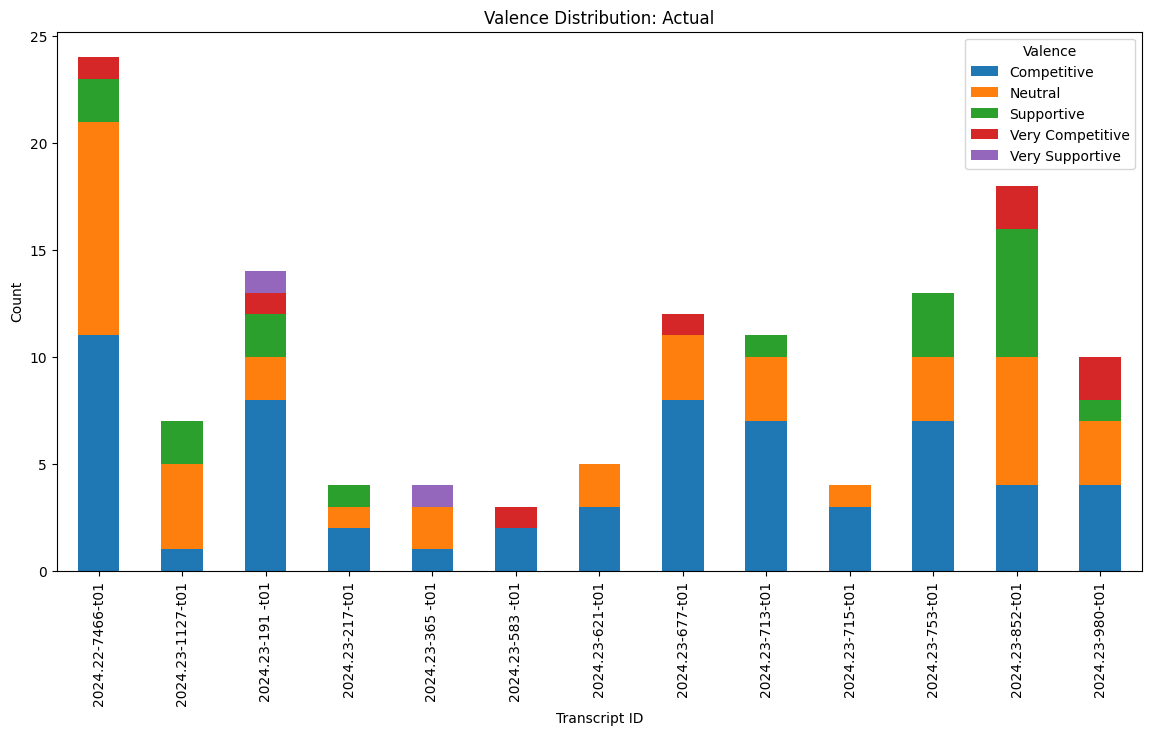

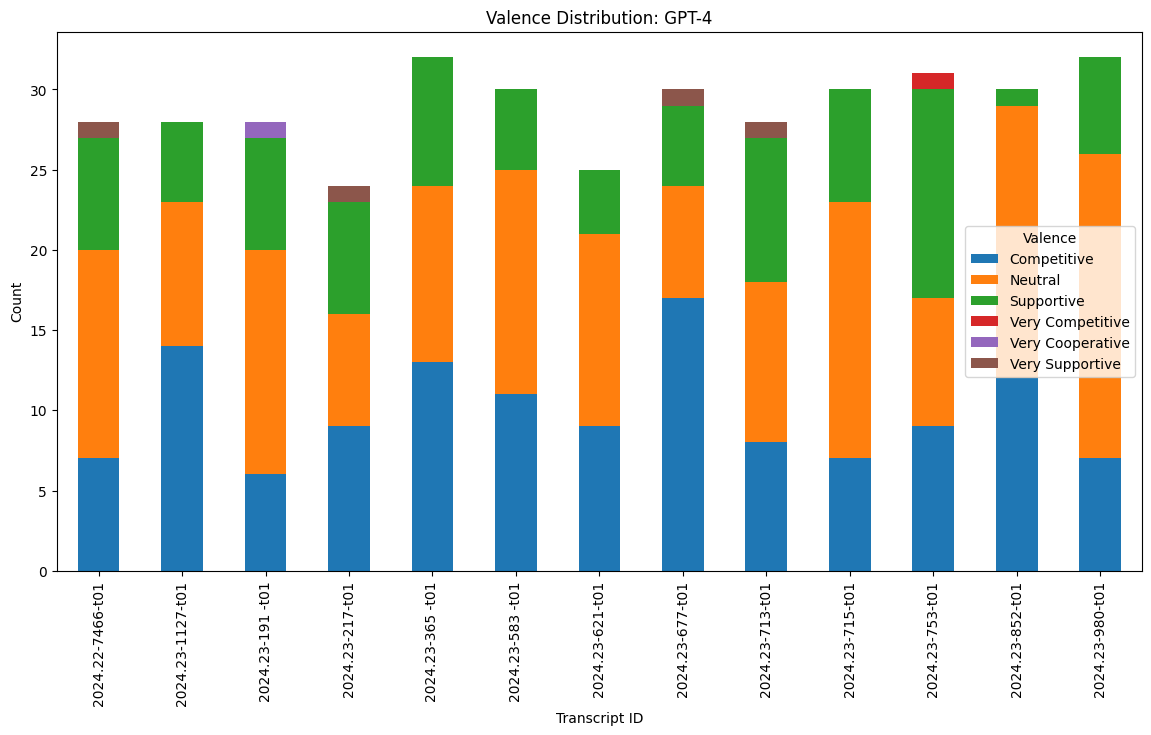

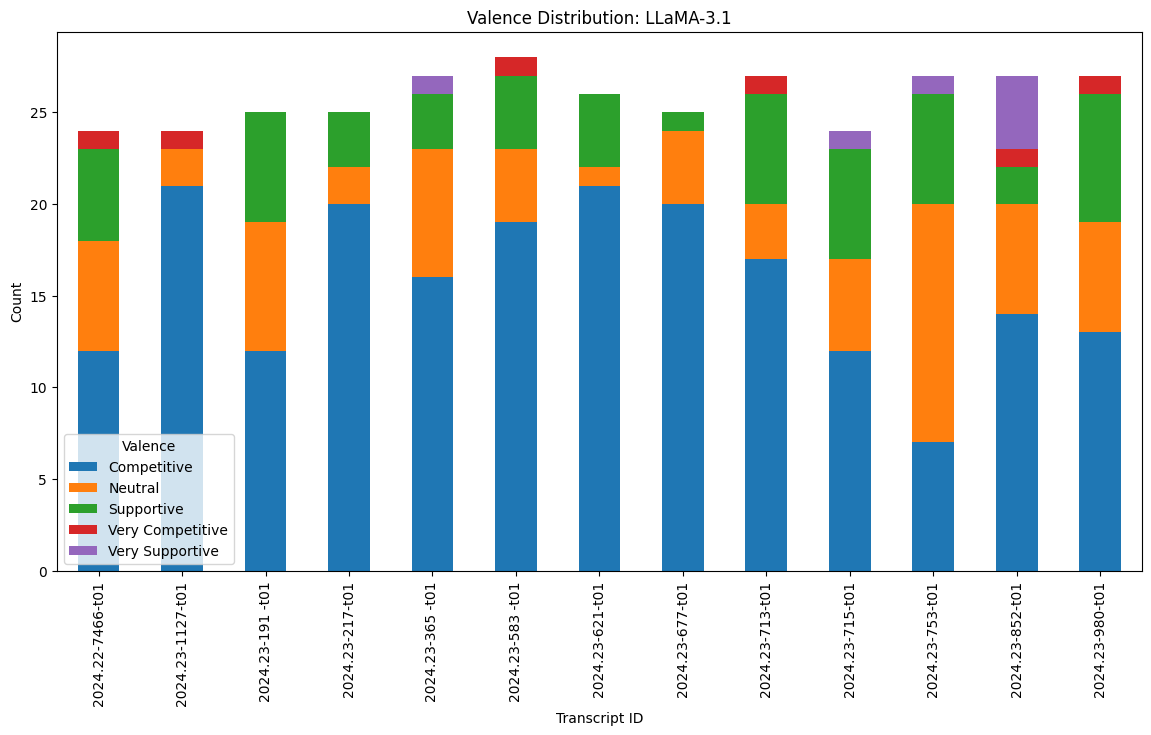

In [ ]:
plt.figure(figsize=(14, 7))
for source, group in combined_valence.groupby('source'):
    valence_counts = group.groupby('transcript_id')['valence'].value_counts().unstack()
    valence_counts.plot(
        kind='bar', stacked=True, figsize=(14, 7),
        title=f"Valence Distribution: {source}", xlabel="Transcript ID", ylabel="Count",
    )
    plt.legend(title="Valence")
    plt.show()


## Heatmaps

#### All 5 valence categories

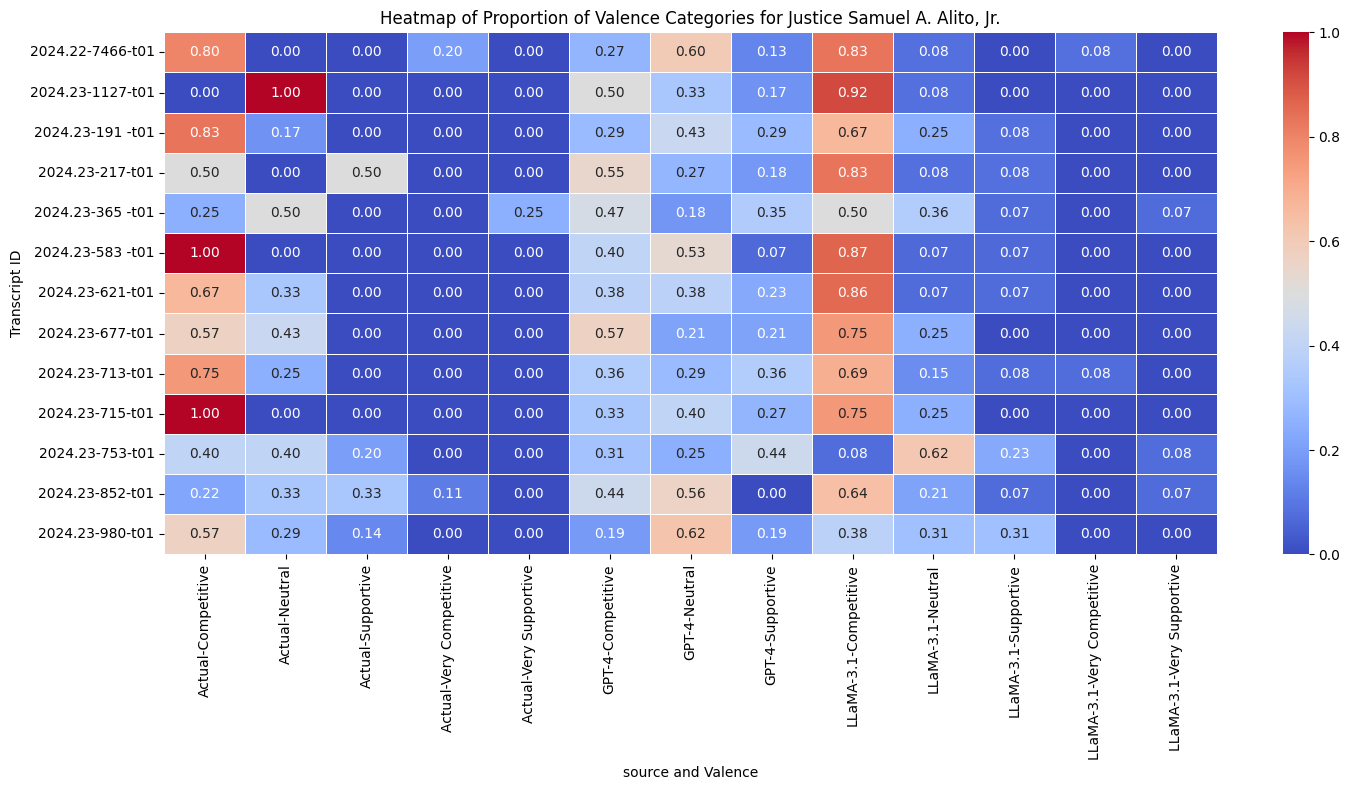

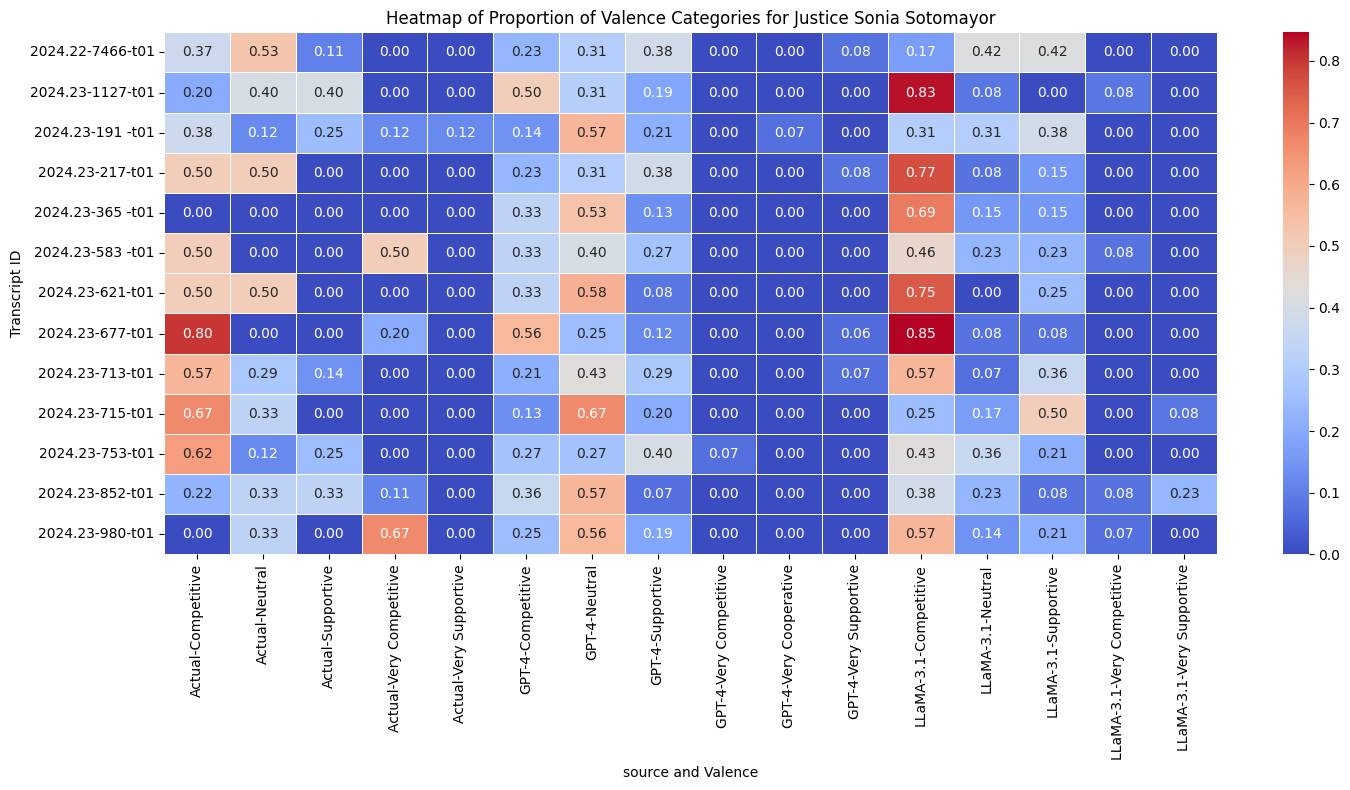

In [ ]:
for justice in combined_valence_proportions['justice'].unique():
    justice_subset = combined_valence_proportions[combined_valence_proportions['justice'] == justice]
    pivot_data = justice_subset.pivot_table(
        index='transcript_id', columns=['source', 'valence'], values='proportion', fill_value=0
    )

    plt.figure(figsize=(15, 8))
    sns.heatmap(pivot_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
    plt.title(f"Heatmap of Proportion of Valence Categories for Justice {justice}")
    plt.xlabel("source and Valence")
    plt.ylabel("Transcript ID")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


#### Bucketed valence categories

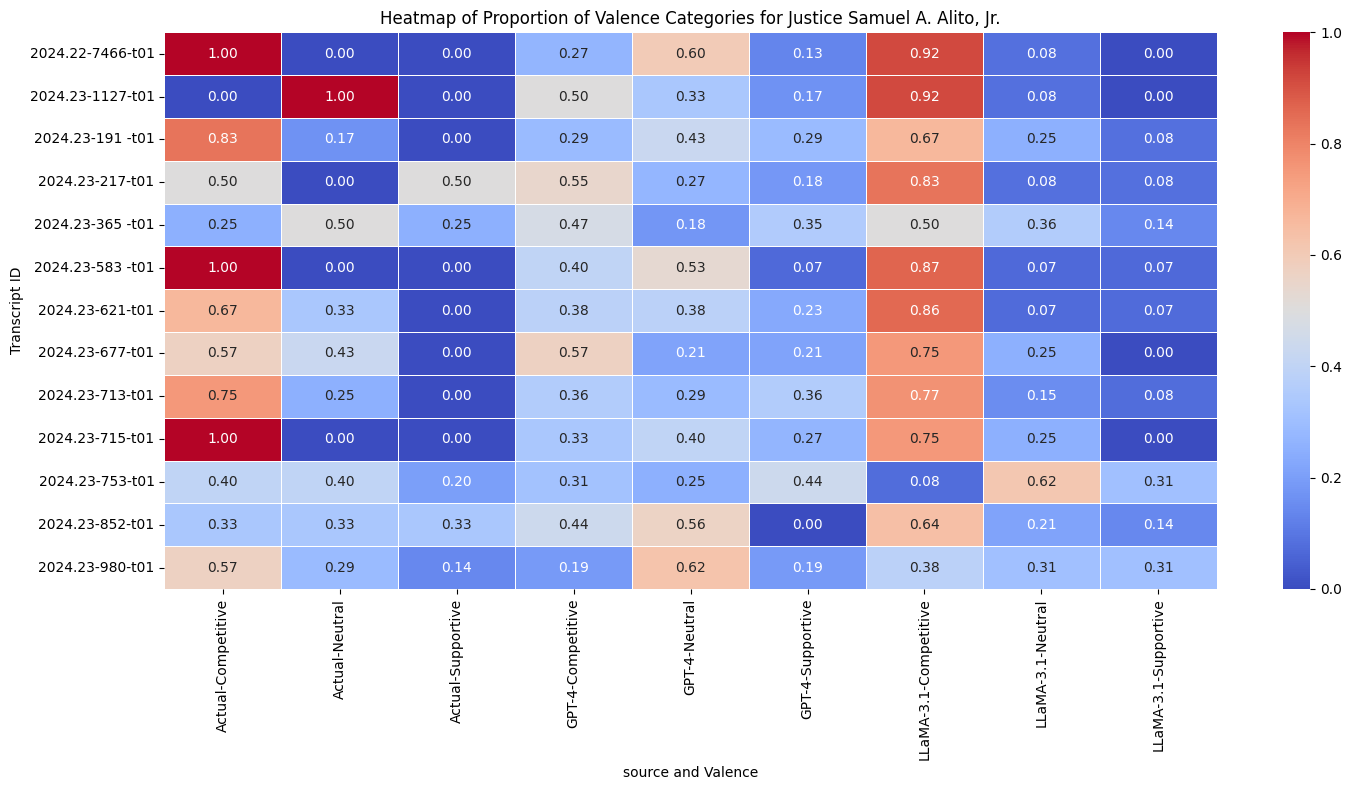

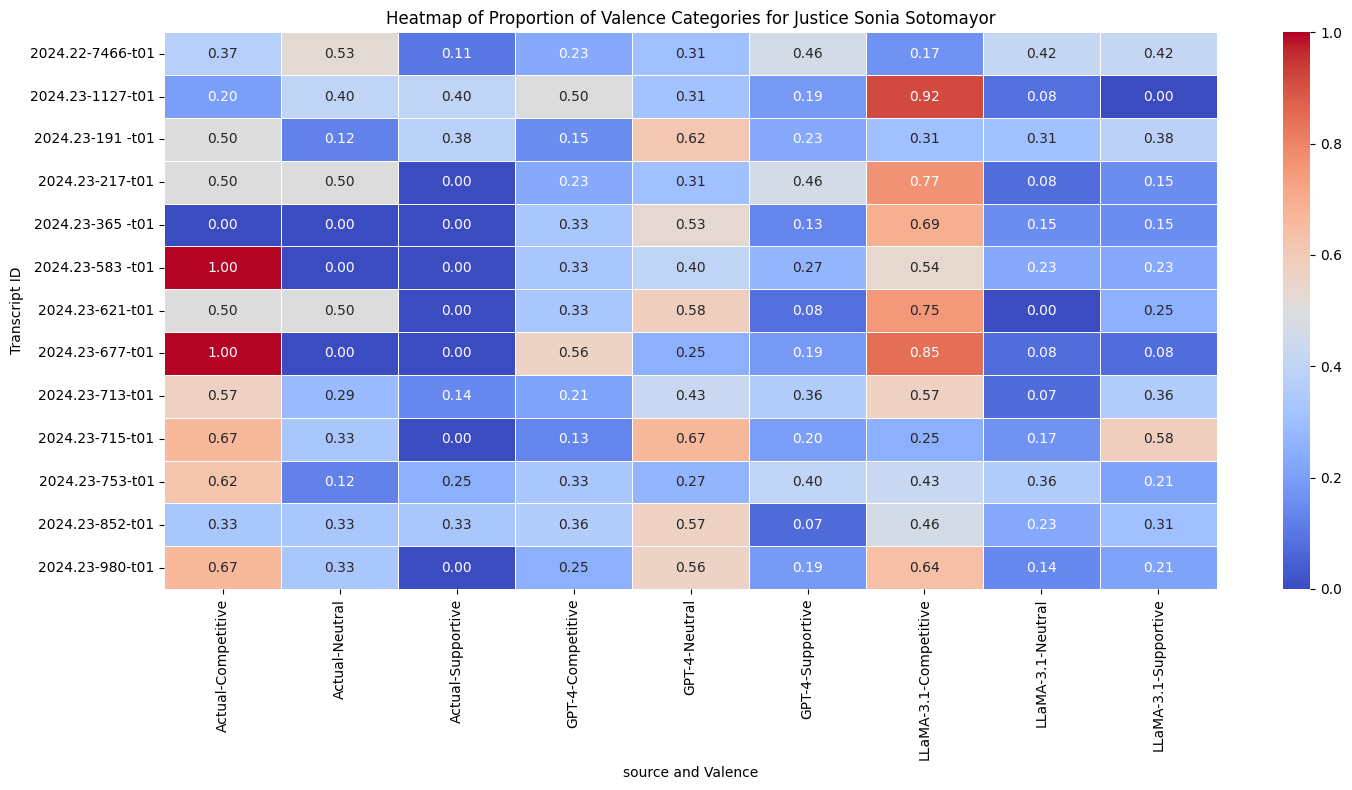

In [20]:
for justice in combined_valence_bucketed_proportions['justice'].unique():
    justice_subset = combined_valence_bucketed_proportions[combined_valence_bucketed_proportions['justice'] == justice]
    pivot_data = justice_subset.pivot_table(
        index='transcript_id', columns=['source', 'bucketed_valence'], values='proportion', fill_value=0
    )

    plt.figure(figsize=(15, 8))
    sns.heatmap(pivot_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
    plt.title(f"Heatmap of Proportion of Valence Categories for Justice {justice}")
    plt.xlabel("source and Valence")
    plt.ylabel("Transcript ID")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Pie Charts

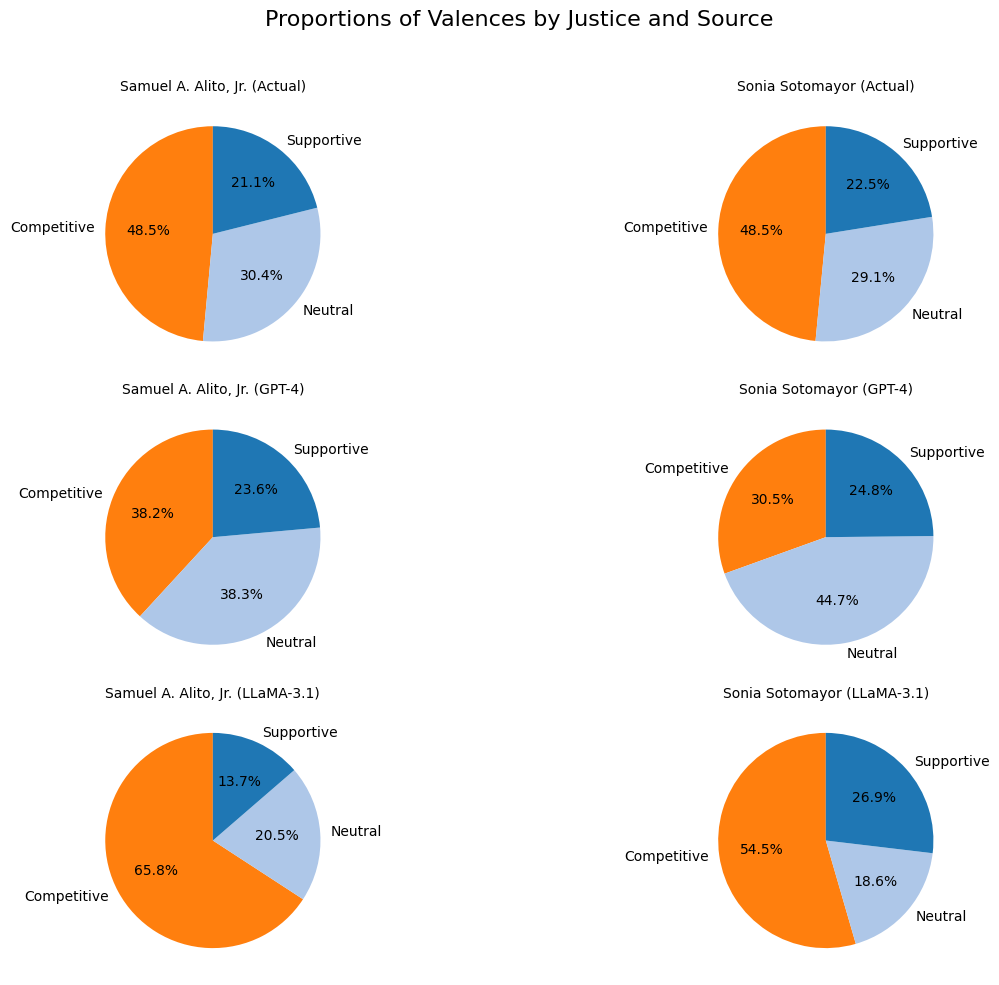

In [ ]:
mean_proportions_pie = combined_valence_bucketed_proportions.groupby(['source', 'justice', 'bucketed_valence'])['proportion'].mean().reset_index()

sources = mean_proportions_pie['source'].unique()
justices = mean_proportions_pie['justice'].unique()


valence_categories = mean_proportions_pie['bucketed_valence'].unique()
valence_categories = valence_categories[::-1] # reverse colors
color_palette = plt.cm.tab20.colors[:len(valence_categories)]
color_map = dict(zip(valence_categories, color_palette))

fig, axes = plt.subplots(len(sources), len(justices), figsize=(14, 10), subplot_kw={'aspect': 'equal'})

for i, source in enumerate(sources):
    for j, justice in enumerate(justices):
        ax = axes[i, j]
        subset = mean_proportions_pie[(mean_proportions_pie['source'] == source) & 
                                      (mean_proportions_pie['justice'] == justice)]
        if not subset.empty:
            colors = [color_map[category] for category in subset['bucketed_valence']]
            ax.pie(
                subset['proportion'], 
                labels=subset['bucketed_valence'], 
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            ax.set_title(f"{justice} ({source})", fontsize=10)
        else:
            ax.axis('off')

plt.suptitle('Proportions of Valences by Justice and Source', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [25]:
type(valence_categories)

numpy.ndarray